In [2]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import data, util
from skimage.measure import label,perimeter,mesh_surface_area
import cv2
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
df=1

In [14]:
df=[]

In [19]:
res=0.2560

for i in range (12):
    path_database = "/mnt/d/crmbm/data_csa_repro/"
    image_dl_sc = nib.load(path_database + 'nl_session_2_medic_7t_multiclass_sc.nii.gz')
    image_dl_sc = np.array(image_dl_sc.get_fdata())
    image_dl_gm = nib.load(path_database + 'nl_session_2_medic_7t_multiclass_gm.nii.gz')
#    image_dl_gm = nib.load(path_database + 'ad_s1_M1_medic_7t_multiclass_gm.nii.gz')
    image_dl_gm = np.array(image_dl_gm.get_fdata())

    image_gt_sc = nib.load(path_database + 'nl_session_2_medic_mask_sc.nii.gz')
#    image_gt_sc = nib.load(path_database + 'ad_s1_M1_medic_mask_sc.nii.gz')
    image_gt_sc = np.array(image_gt_sc.get_fdata())
#    image_gt_sc = nib.load(path_database + 'ad_s1_M1_medic_mask_sc.nii.gz')
    image_gt_gm = nib.load(path_database + 'nl_session_2_medic_mask_gm.nii.gz')
    image_gt_gm = np.array(image_gt_gm.get_fdata())

    csa_dl_sc=(res**2)*(np.sum(image_dl_sc[:,:,i]))
    csa_dl_gm=(res**2)*(np.sum(image_dl_gm[:,:,i]))
    csa_gt_sc=(res**2)*(np.sum(image_gt_sc[:,:,i]))
    csa_gt_gm=(res**2)*(np.sum(image_gt_gm[:,:,i]))

    error_sc=csa_gt_sc- csa_dl_sc
    error_gm=csa_gt_gm- csa_dl_gm

    d = {'slices': i, 'csa_dl_sc': csa_dl_sc,'csa_dl_gm':csa_dl_gm,'csa_gt_sc':csa_gt_sc,
         'csa_gt_gm':csa_gt_gm,'error_sc':error_sc,'error_gm':error_gm}

    df.append(d)
    data = pd.DataFrame(data=df)
data

,slices,csa_dl_sc,csa_dl_gm,csa_gt_sc,csa_gt_gm,error_sc,error_gm
0,0,78.249984,9.699328,81.002496,12.648448,2.752512,2.949120
1,1,80.805888,10.027008,84.934656,12.582912,4.128768,2.555904
2,2,80.740352,9.633792,83.296256,13.500416,2.555904,3.866624
3,3,83.755008,9.633792,85.393408,11.665408,1.638400,2.031616
4,4,83.558400,10.944512,86.573056,13.303808,3.014656,2.359296
5,5,86.900736,12.517376,87.818240,14.942208,0.917504,2.424832
6,6,88.539136,14.680064,89.784320,17.301504,1.245184,2.621440
7,7,86.114304,13.762560,91.422720,16.908288,5.308416,3.145728
8,8,83.165184,13.565952,88.735744,17.367040,5.570560,3.801088
9,9,80.740352,13.238272,84.606976,15.859712,3.866624,2.621440


In [4]:

data.to_csv(path_database + '/c_dl_gt_clean.csv')

NameError: name 'path_database' is not defined

In [30]:
path_database = "/mnt/d/crmbm"
data=pd.read_excel(path_database + '/csa_dl_gt_clean.xlsx')
data

,ID,Sub,Slice,transf,csa_soft_sc_gt,SD_sc_gt,csa_sc_gt,csa_soft_sc_dl,SD_sc_dl,csa_sc_dl,...,csa_gm_gt,csa_soft_gm_dl,SD_gm_dl,csa_gm_dl,%sc gt,%sc dl,%gm gt,%gm dl,error sc,error gm
0,2,29,2,0,44.36,1.99,46.34,45.18,2.79,47.97,...,8.71,7.77,1.26,9.02,54.025088,54.970191,53.910615,54.146341,0.945103,0.235727
1,2,29,2,1,49.39,2.20,51.60,50.11,2.96,53.07,...,9.73,8.74,1.09,9.82,60.151017,60.968488,60.474860,60.905923,0.817471,0.431063
2,2,29,2,2,57.54,2.56,60.11,57.99,2.90,60.89,...,11.26,10.25,1.26,11.51,70.076726,70.556029,69.762570,71.428571,0.479302,1.666002
3,2,29,2,3,65.83,2.95,68.78,66.25,3.14,69.39,...,12.92,11.64,1.58,13.21,80.172939,80.605913,80.167598,81.114983,0.432974,0.947385
4,2,29,2,4,74.10,3.31,77.42,74.50,3.57,78.07,...,14.53,13.10,1.61,14.71,90.244794,90.643631,90.083799,91.289199,0.398837,1.205400
5,2,29,2,5,75.68,3.40,79.08,75.98,3.78,79.76,...,14.86,13.27,1.58,14.85,92.169042,92.444336,92.178771,92.473868,0.275295,0.295097
6,2,29,2,6,77.25,3.46,80.71,77.64,3.78,81.42,...,15.18,13.54,1.55,15.08,94.081111,94.464047,94.203911,94.355401,0.382936,0.151490
7,2,29,2,7,78.87,3.53,82.41,79.27,3.76,83.03,...,15.49,13.76,1.62,15.38,96.054074,96.447256,96.089385,95.888502,0.393183,0.200884
8,2,29,2,8,80.49,3.61,84.10,81.08,3.85,84.94,...,15.81,14.04,1.69,15.73,98.027037,98.649471,98.044693,97.839721,0.622434,0.204971
9,2,29,2,9,82.11,3.68,85.79,82.19,3.87,86.06,...,16.12,14.35,1.79,16.14,100.000000,100.000000,100.000000,100.000000,0.000000,0.000000


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

9_GT vs. 9_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=4.500e+00
10_GT vs. 10_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:7.000e-01 U_stat=3.000e+00
11_GT vs. 11_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:7.000e-01 U_stat=3.000e+00
12_GT vs. 12_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:7.000e-01 U_stat=3.000e+00
13_GT vs. 13_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=5.000e+00
14_GT vs. 14_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:7.000e-01 U_stat=6.000e+00
15_GT vs. 15_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:7.000e-01 U_stat=6.000e+00
16_GT vs. 16_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:7.000e-01 U_stat=6.000e+00
17_GT vs. 17_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e-01 U_stat=9.000e+00
8_GT vs. 8_DL: Mann-Whitney-W

(<AxesSubplot:xlabel='Downsampling factor\n ← Low       High  →', ylabel='CSA error [in %]'>,
  <statannotations.Annotation.Annotation at 0x7f3ac840c990>])

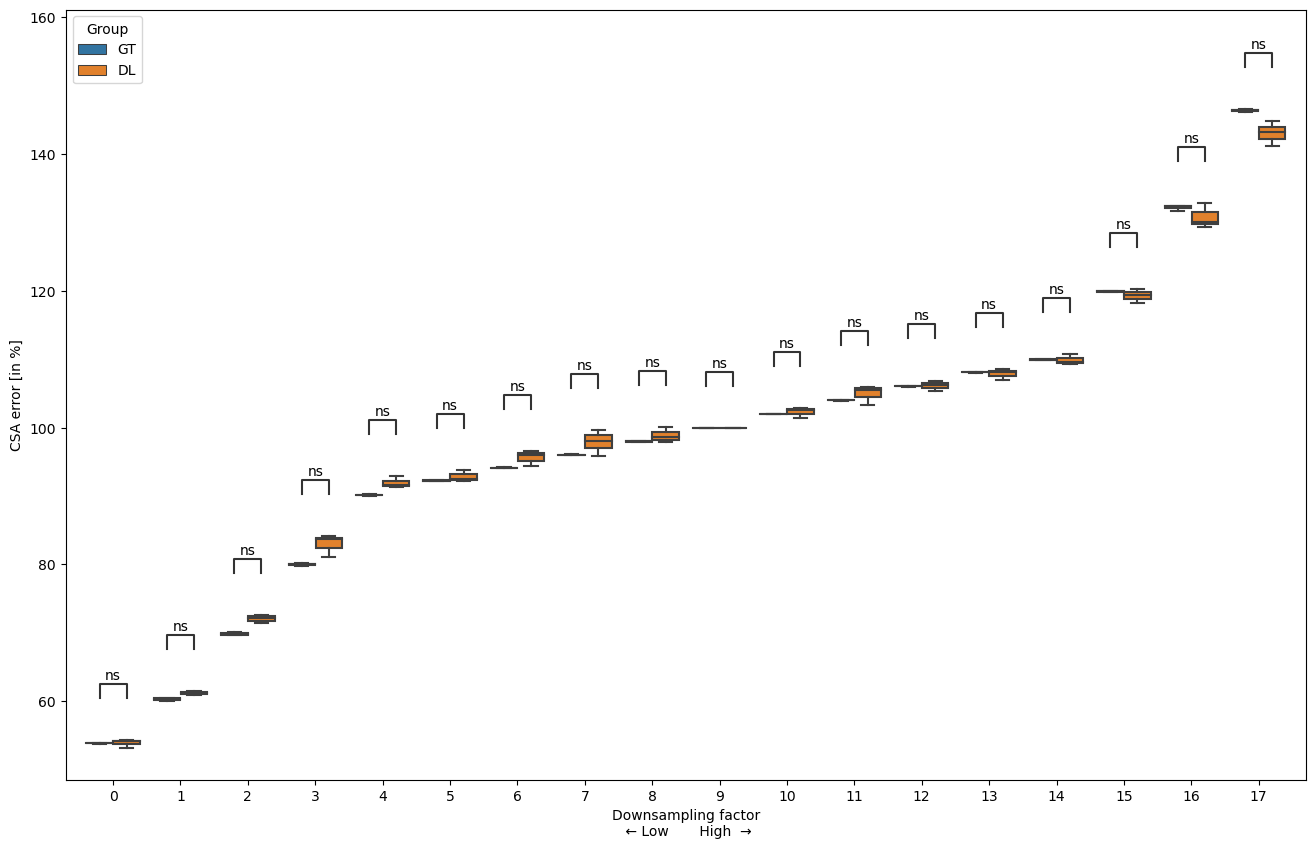

In [32]:
df1=data
df_csa_gm = df1.filter(['%gm gt','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'GT')
df_csa_gm.rename(columns={'%gm gt': 'CSA_error'}, inplace=True)
df_csa_lin_gm = df1.filter(['%gm dl','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'DL')
df_csa_lin_gm.rename(columns={'%gm dl': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(16,10))
ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group")
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA error [in %]')

pairs=[((0, "GT"), (0, "DL")),
       ((1, "GT"), (1, "DL")),
       ((2, "GT"), (2, "DL")),
       ((3, "GT"), (3, "DL")),
       ((4, "GT"), (4, "DL")),
       ((5, "GT"), (5, "DL")),
       ((6, "GT"), (6, "DL")),
       ((7, "GT"), (7, "DL")),
       ((8, "GT"), (8, "DL")),
       ((9, "GT"), (9, "DL")),
       ((10, "GT"), (10, "DL")),
       ((11, "GT"), (11, "DL")),
       ((12, "GT"), (12, "DL")),
       ((13, "GT"), (13, "DL")),
       ((14, "GT"), (14, "DL")),
       ((15, "GT"), (15, "DL")),
       ((16, "GT"), (16, "DL")),
       ((17, "GT"), (17, "DL"))]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa_gm, x="transf", y="CSA_error", hue='Group')#, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

In [117]:
df = []

In [122]:

#slices=0
#transf=0
res=0.175781
for slices in range (12):
    for transf in range (18):
        path_database = "pro_scaling/CSA_uncert_scaling/centering/"
        image_soft_sc = nib.load(path_database + 'soft_sc_'+ str(slices).zfill(4)+'_'+ str(transf).zfill(2)+ '_center.nii.gz')
        image_soft_sc_gt = np.array(image_soft_sc.get_fdata())
        image_soft_gm = nib.load(path_database + 'soft_gm_'+ str(slices).zfill(4)+'_'+ str(transf).zfill(2)+ '_center.nii.gz')
        image_soft_gm_gt = np.array(image_soft_gm.get_fdata())
        image_unc_sc = nib.load(path_database + 'unc_sc_'+ str(slices).zfill(4)+'_'+ str(transf).zfill(2)+ '_center.nii.gz')
        image_unc_sc_gt = np.array(image_unc_sc.get_fdata())
        image_unc_gm = nib.load(path_database + 'unc_gm_'+ str(slices).zfill(4)+'_'+ str(transf).zfill(2)+ '_center.nii.gz')
        image_unc_gm_gt = np.array(image_unc_gm.get_fdata())

        path_database = "pro_scaling/DB_scaling/split/"
        image_soft_sc = nib.load(path_database + 'soft_sc_'+str(transf).zfill(2)+'_'+ str(slices).zfill(4)+ '.nii.gz')
        image_soft_sc_dl = np.array(image_soft_sc.get_fdata())
        image_soft_gm = nib.load(path_database + 'soft_gm_'+str(transf).zfill(2)+'_'+ str(slices).zfill(4)+ '.nii.gz')
        image_soft_gm_dl = np.array(image_soft_gm.get_fdata())
        image_unc_sc = nib.load(path_database + 'unc_sc_'+str(transf).zfill(2)+'_'+ str(slices).zfill(4)+ '.nii.gz')
        image_unc_sc_dl = np.array(image_unc_sc.get_fdata())
        image_unc_gm = nib.load(path_database + 'unc_gm_'+str(transf).zfill(2)+'_'+ str(slices).zfill(4)+ '.nii.gz')
        image_unc_gm_dl = np.array(image_unc_gm.get_fdata())

        csa_soft_sc_gt=(res**2)*(np.sum(image_soft_sc_gt[:,:,0]))
        csa_soft_gm_gt=(res**2)*(np.sum(image_soft_gm_gt[:,:,0]))
        csa_unc_sc_gt=(res**2)*(np.sum(image_unc_sc_gt[:,:,0]))
        csa_unc_gm_gt=(res**2)*(np.sum(image_unc_gm_gt[:,:,0]))
        csa_sc_gt = (csa_soft_sc_gt + csa_unc_sc_gt)
        csa_gm_gt = (csa_soft_gm_gt + csa_unc_gm_gt)

        csa_soft_sc_dl=(res**2)*(np.sum(image_soft_sc_dl[:,:,]))
        csa_soft_gm_dl=(res**2)*(np.sum(image_soft_gm_dl[:,:]))
        csa_unc_sc_dl=(res**2)*(np.sum(image_unc_sc_dl[:,:,]))
        csa_unc_gm_dl=(res**2)*(np.sum(image_unc_gm_dl[:,:]))
        csa_sc_dl = (csa_soft_sc_dl + csa_unc_sc_dl)
        csa_gm_dl = (csa_soft_gm_dl + csa_unc_gm_dl)

        error_sc = 100*(np.abs(csa_sc_gt - csa_sc_dl))/csa_sc_gt 
        error_gm = 100*(np.abs(csa_gm_gt - csa_gm_dl))/csa_gm_gt 

        d = {'slices': slices, 'transf': transf,'csa_soft_sc_gt':csa_soft_sc_gt,'csa_soft_gm_gt':csa_soft_gm_gt,
             'csa_soft_sc_dl':csa_soft_sc_dl,'csa_soft_gm_dl':csa_soft_gm_dl,'csa_unc_sc_gt':csa_unc_sc_gt,
             'csa_unc_gm_gt':csa_unc_gm_gt,'csa_unc_sc_dl':csa_unc_sc_dl,'csa_unc_gm_dl':csa_unc_gm_dl,'csa_sc_gt':csa_sc_gt,
             'csa_gm_gt':csa_gm_gt,'csa_sc_dl':csa_sc_dl,'csa_gm_dl':csa_gm_dl,'error_sc':error_sc,'error_gm':error_gm}

        df.append(d)
        data = pd.DataFrame(data=df)
data

,slices,transf,csa_soft_sc_gt,csa_soft_gm_gt,csa_soft_sc_dl,csa_soft_gm_dl,csa_unc_sc_gt,csa_unc_gm_gt,csa_unc_sc_dl,csa_unc_gm_dl,csa_sc_gt,csa_gm_gt,csa_sc_dl,csa_gm_dl,error_sc,error_gm
0,0,0,37.459417,5.929705,37.578951,5.798080,1.069023,0.864315,1.493640,1.245256,38.528441,6.794020,39.072591,7.043336,1.412334,0.647095
1,0,1,41.604468,6.607575,41.744971,6.757771,1.157367,0.956877,1.573114,1.039169,42.761835,7.564453,43.318086,7.796940,1.300812,0.543679
2,0,2,48.530718,7.661529,48.603604,7.868201,1.334129,1.095744,1.850692,1.317609,49.864847,8.757273,50.454295,9.185810,1.182092,0.859397
3,0,3,55.519847,8.776779,55.607652,8.986472,1.535938,1.264389,1.713466,1.382509,57.055786,10.041168,57.321117,10.368981,0.465039,0.574547
4,0,4,62.508306,9.893808,62.589214,10.087015,1.731745,1.423491,1.699937,1.594428,64.240051,11.317298,64.289151,11.681443,0.076433,0.566850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,11,13,82.830939,12.468576,82.693771,12.297091,3.887160,2.820016,4.376241,2.862322,86.718099,15.288591,87.070012,15.159413,0.405812,0.844932
428,11,14,84.359549,12.706073,84.036435,12.249918,3.962936,2.882330,4.356561,2.711553,88.322486,15.588403,88.392996,14.961471,0.079832,4.021781
429,11,15,92.086773,13.829201,91.272692,13.419719,4.315880,3.143845,3.824434,2.935566,96.402653,16.973046,95.097126,16.355284,1.354244,3.639662
430,11,16,101.427235,15.227727,100.470318,14.348753,4.783464,3.478568,5.073995,3.158665,106.210698,18.706295,105.544313,17.507419,0.627419,6.408946


In [126]:
data.to_csv(path_database + '/csa_scaling_gt_dl.csv')

In [5]:
data=pd.read_csv('/mnt/d/crmbm/csa_scaling_gt_dl.csv') 

ParserError: Error tokenizing data. C error: Expected 10 fields in line 38, saw 19


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

9_GT vs. 9_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.770e-01 U_stat=2.800e+02
10_GT vs. 10_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:3.694e-01 U_stat=3.320e+02
11_GT vs. 11_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.704e-01 U_stat=3.160e+02
12_GT vs. 12_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:6.278e-01 U_stat=3.120e+02
13_GT vs. 13_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.704e-01 U_stat=3.160e+02
14_GT vs. 14_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:3.694e-01 U_stat=3.320e+02
15_GT vs. 15_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.637e-01 U_stat=3.560e+02
16_GT vs. 16_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.901e-01 U_stat=3.520e+02
17_GT vs. 17_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:2.522e-01 U_stat=3.440e+02
8_GT vs. 8_DL: Mann-Whitney-W

(<AxesSubplot:xlabel='Downsampling factor\n ← Low       High  →', ylabel='CSA SC [in mm2]'>,
  <statannotations.Annotation.Annotation at 0x7fe65e16f6d0>])

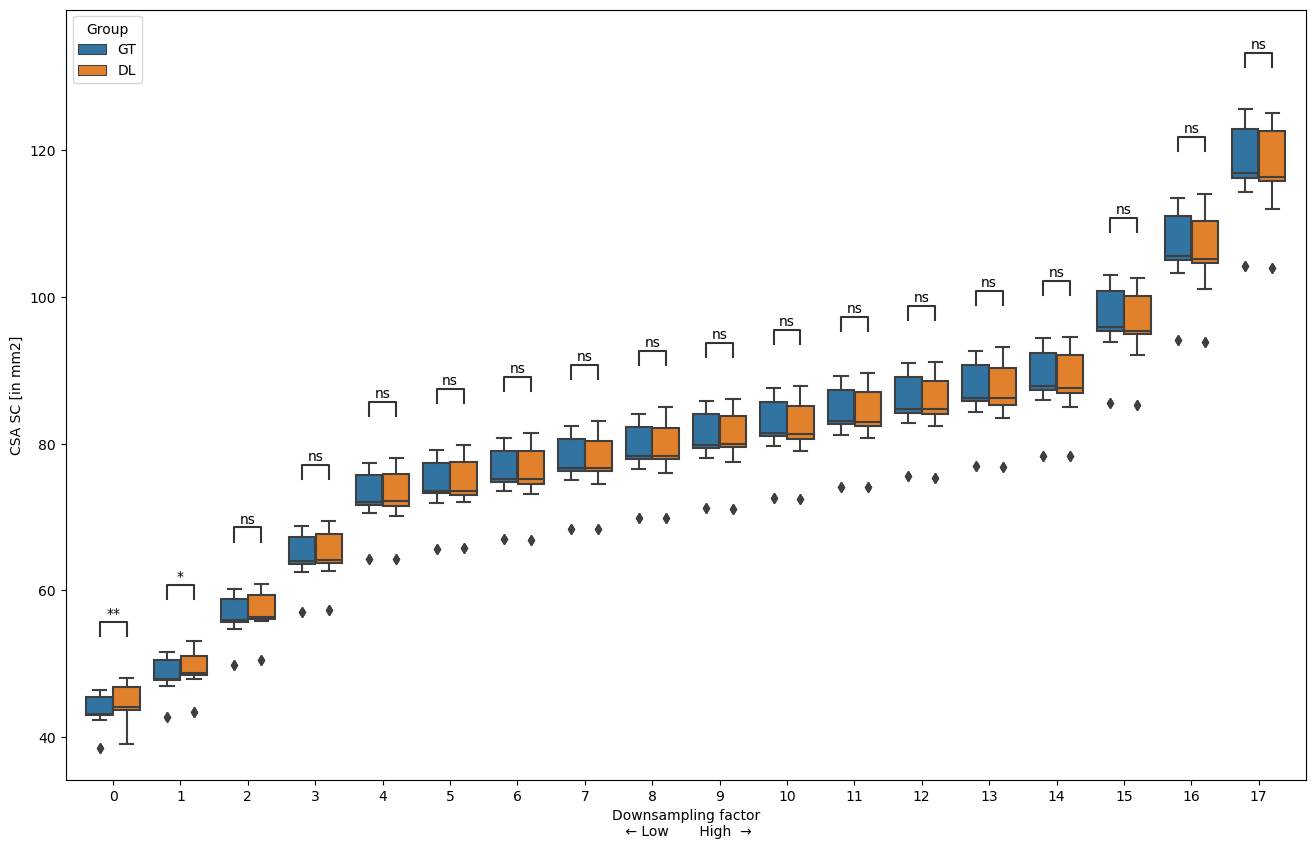

In [4]:
df1=data
df_csa_gm = df1.filter(['csa_sc_gt','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'GT')
df_csa_gm.rename(columns={'csa_sc_gt': 'CSA_error'}, inplace=True)
df_csa_lin_gm = df1.filter(['csa_sc_dl','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'DL')
df_csa_lin_gm.rename(columns={'csa_sc_dl': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(16,10))
ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group")
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA SC [in mm2]')

pairs=[((0, "GT"), (0, "DL")),
       ((1, "GT"), (1, "DL")),
       ((2, "GT"), (2, "DL")),
       ((3, "GT"), (3, "DL")),
       ((4, "GT"), (4, "DL")),
       ((5, "GT"), (5, "DL")),
       ((6, "GT"), (6, "DL")),
       ((7, "GT"), (7, "DL")),
       ((8, "GT"), (8, "DL")),
       ((9, "GT"), (9, "DL")),
       ((10, "GT"), (10, "DL")),
       ((11, "GT"), (11, "DL")),
       ((12, "GT"), (12, "DL")),
       ((13, "GT"), (13, "DL")),
       ((14, "GT"), (14, "DL")),
       ((15, "GT"), (15, "DL")),
       ((16, "GT"), (16, "DL")),
       ((17, "GT"), (17, "DL"))]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa_gm, x="transf", y="CSA_error", hue='Group')#, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

9_GT vs. 9_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.124e-01 U_stat=3.000e+02
10_GT vs. 10_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=2.880e+02
11_GT vs. 11_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.770e-01 U_stat=2.960e+02
12_GT vs. 12_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.424e-01 U_stat=2.920e+02
13_GT vs. 13_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.704e-01 U_stat=3.160e+02
14_GT vs. 14_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.770e-01 U_stat=2.960e+02
15_GT vs. 15_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.704e-01 U_stat=3.160e+02
16_GT vs. 16_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:3.694e-01 U_stat=3.320e+02
17_GT vs. 17_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:3.694e-01 U_stat=3.320e+02
8_GT vs. 8_DL: Mann-Whitney-W

(<AxesSubplot:xlabel='Downsampling factor\n ← Low       High  →', ylabel='CSA GM [in mm2]'>,
  <statannotations.Annotation.Annotation at 0x7fca20b259a0>])

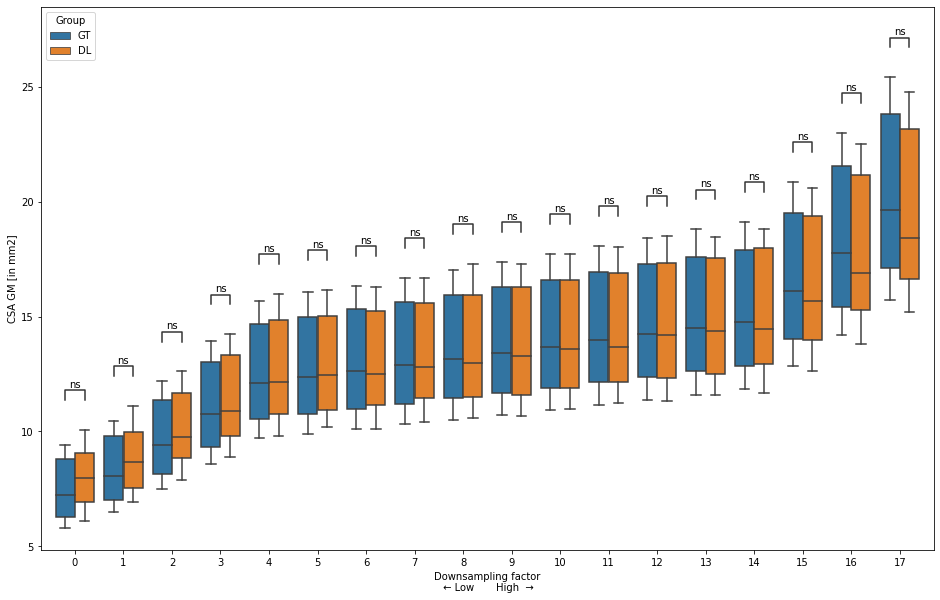

In [124]:
df1=data
df_csa_gm = df1.filter(['csa_gm_gt','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'GT')
df_csa_gm.rename(columns={'csa_gm_gt': 'CSA_error'}, inplace=True)
df_csa_lin_gm = df1.filter(['csa_gm_dl','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'DL')
df_csa_lin_gm.rename(columns={'csa_gm_dl': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(16,10))
ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group")
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA GM [in mm2]')

pairs=[((0, "GT"), (0, "DL")),
       ((1, "GT"), (1, "DL")),
       ((2, "GT"), (2, "DL")),
       ((3, "GT"), (3, "DL")),
       ((4, "GT"), (4, "DL")),
       ((5, "GT"), (5, "DL")),
       ((6, "GT"), (6, "DL")),
       ((7, "GT"), (7, "DL")),
       ((8, "GT"), (8, "DL")),
       ((9, "GT"), (9, "DL")),
       ((10, "GT"), (10, "DL")),
       ((11, "GT"), (11, "DL")),
       ((12, "GT"), (12, "DL")),
       ((13, "GT"), (13, "DL")),
       ((14, "GT"), (14, "DL")),
       ((15, "GT"), (15, "DL")),
       ((16, "GT"), (16, "DL")),
       ((17, "GT"), (17, "DL"))]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa_gm, x="transf", y="CSA_error", hue='Group')#, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

9_SC vs. 9_GM: Mann-Whitney-Wilcoxon test two-sided, P_val:9.753e-01 U_stat=2.860e+02
10_SC vs. 10_GM: Mann-Whitney-Wilcoxon test two-sided, P_val:1.010e-01 U_stat=3.680e+02
11_SC vs. 11_GM: Mann-Whitney-Wilcoxon test two-sided, P_val:8.125e-01 U_stat=2.760e+02
12_SC vs. 12_GM: Mann-Whitney-Wilcoxon test two-sided, P_val:4.392e-01 U_stat=3.260e+02
13_SC vs. 13_GM: Mann-Whitney-Wilcoxon test two-sided, P_val:3.696e-01 U_stat=3.320e+02
14_SC vs. 14_GM: Mann-Whitney-Wilcoxon test two-sided, P_val:8.446e-01 U_stat=2.780e+02
15_SC vs. 15_GM: Mann-Whitney-Wilcoxon test two-sided, P_val:4.640e-01 U_stat=2.520e+02
16_SC vs. 16_GM: Mann-Whitney-Wilcoxon test two-sided, P_val:8.501e-02 U_stat=2.040e+02
17_SC vs. 17_GM: Mann-Whitney-Wilcoxon test two-sided, P_val:4.010e-03 U_stat=1.480e+02
8_SC vs. 8_GM: Mann-Whitney-W

(<AxesSubplot:xlabel='Downsampling factor\n ← Low       High  →', ylabel='CSA error [in %]'>,
  <statannotations.Annotation.Annotation at 0x7fca20a792b0>])

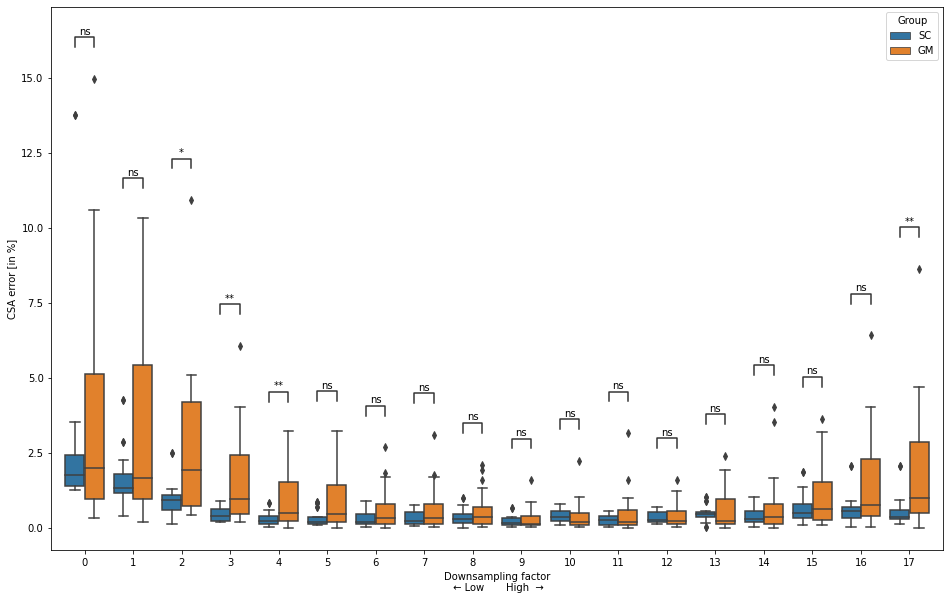

In [125]:
df1=data
df_csa_gm = df1.filter(['error_sc','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'SC')
df_csa_gm.rename(columns={'error_sc': 'CSA_error'}, inplace=True)
df_csa_lin_gm = df1.filter(['error_gm','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'GM') 
df_csa_lin_gm.rename(columns={'error_gm': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(16,10))
ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group")
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA error [in %]')

pairs=[((0, "SC"), (0, "GM")),
       ((1, "SC"), (1, "GM")),
       ((2, "SC"), (2, "GM")),
       ((3, "SC"), (3, "GM")),
       ((4, "SC"), (4, "GM")),
       ((5, "SC"), (5, "GM")),
       ((6, "SC"), (6, "GM")),
       ((7, "SC"), (7, "GM")),
       ((8, "SC"), (8, "GM")),
       ((9, "SC"), (9, "GM")),
       ((10, "SC"), (10, "GM")),
       ((11, "SC"), (11, "GM")),
       ((12, "SC"), (12, "GM")),
       ((13, "SC"), (13, "GM")),
       ((14, "SC"), (14, "GM")),
       ((15, "SC"), (15, "GM")),
       ((16, "SC"), (16, "GM")),
       ((17, "SC"), (17, "GM"))]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa_gm, x="transf", y="CSA_error", hue='Group')#, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

In [59]:
# CSA uncertainty
path_database = 'Multiclass_SC_GM/Train_MCS_all_DA_merge/'
sujet_index=29
interations=1000

#    image_data_SC = nib.load(path_database  + 'sub-' + str(sujet_index).zfill(2) +'_T2star_7t_multiclass_gm.nii.gz')
#image_data = nib.load(path_database  + 'sub-' + str(sujet_index).zfill(2) +'_T2star_unc-vox.nii.gz')
image_data = nib.load(path_database  + 'pred_masks_' +str(interations).zfill(1) + '/sub-'+str(sujet_index).zfill(2)+'_T2star_unc-vox.nii.gz')
#image_data = nib.load(path_database  + 'soft_0002.nii.gz')

header_info = image_data.header
image = np.array(image_data.get_fdata())
image_GM = image[:,:,:,1]
image_SC = image[:,:,:,0]
#for i in range (image_SC.shape[2]):
#sc_pixels = cv2.countNonZero(image_SC[:,:,i])
for slices in range ((image_SC.shape[2])):
    pixel_gm=np.sum(image_GM[:,:,slices])
    pixel_sc=np.sum(image_SC[:,:,slices])
    d = {'subject': sujet_index, 'slices': slices,'interations':interations,'pixel_sc':pixel_sc,'pixel_gm':pixel_gm,
             }
    df.append(d)
data = pd.DataFrame(data=df)
data

,subject,slices,interations,pixel_sc,pixel_gm
0,29,0,2,6.234329,0.000000
1,29,1,2,67.146785,191.808716
2,29,2,2,32.370808,33.169640
3,29,3,2,31.449701,23.803548
4,29,4,2,24.807466,24.555152
...,...,...,...,...,...
65,29,2,1000,125.668385,59.713881
66,29,3,1000,75.473117,54.016530
67,29,4,1000,79.470524,50.620955
68,29,5,1000,71.687158,49.378499


In [60]:
path_database = "pro_scaling/"
data.to_csv(path_database + 'CSA_uncertainty_only.csv')

In [150]:
image_data = nib.load(path_database  + 'sc_proba_0002.nii.gz')

header_info = image_data.header
image_SC = np.array(image_data.get_fdata())

image_data = nib.load(path_database  + 'gm_proba_0002.nii.gz')
header_info = image_data.header
image_GM = np.array(image_data.get_fdata())

pixel_gm=np.sum(image_GM[:,:])
pixel_sc=np.sum(image_SC[:,:])

In [151]:
print(pixel_sc)
print(pixel_gm)

2655.959416896105
470.1064940094948


In [117]:
print(pixel_sc)
print(pixel_gm)

44.790286217891946
34.01361544283799


In [135]:
(image_SC.shape)

(128, 128)

In [103]:
max(image_SC.flatten())

1.0

In [128]:
image_SC=image_SC[:,:,0]

In [138]:
Size_X=(image_SC.shape)[0]
Size_Y=(image_SC.shape)[1]
#Size_Z=(image_LE.shape)[2]
img_new_GM=np.zeros((Size_X,Size_Y))
for i in range(len(image_SC[:,0])):
    for j in range( len(image_SC[0,:])):
#        for z in range( len(image_LE[0,0,:])):
        if image_GM[i,j] == 0 :
            img_new_GM[i,j] = 1
        if image_GM[i,j] == 1 :
            img_new_GM[i,j] = 0

In [139]:
LE = nib.Nifti1Image(img_new_GM, image_data.affine)
nib.save(LE,path_database + 'invers.nii.gz' )

In [ ]:
    for i in range(len(image_GM[:,0])):
        for j in range( len(image_GM[0,:])):
                if image_GM[i,j] !=0 and image_GM[i,j]!=1:
                    #h=image_SC[i,j]
                    pro_gm = {'proba':image_GM[i,j]}
                    n.append(pro_gm)
    proba_gm = pd.DataFrame(data=n)

In [43]:
df = []

In [45]:
# csa of external data
rater='nl'
for sujet_index in range (0,5):
    path_database = 'Multiclass_SC_GM/DB_external/'
#    image_data_SC = nib.load(path_database  + 'sub-' + str(sujet_index).zfill(2) +'_T2star_7t_multiclass_gm.nii.gz')
    image_data_SC = nib.load(path_database  + 'sub-' + str(sujet_index).zfill(4) +'_T2star_mask_GM_nl.nii.gz')
    header_info_SC = image_data_SC.header
    image_SC = np.array(image_data_SC.get_fdata())
    
    image_data_GM = nib.load(path_database  + 'sub-' + str(sujet_index).zfill(4) +'_T2star_mask_SC_vc.nii.gz')
    header_info_GM = image_data_GM.header
    #header_info_GM['pixdim'][1:4]  = [0.175781,0.175781,2.2]
    image_GM = np.array(image_data_GM.get_fdata())
    print(image_GM.shape,type(image_GM.shape))

    for i in range (image_SC.shape[2]):
        sc_contour = perimeter(image_SC[:,:,i]) * 0.17578125 
        gm_contour = perimeter(image_GM[:,:,i]) * 0.17578125 
        #print (sc_contour)
        sc_pixels = cv2.countNonZero(image_SC[:,:,i])
        
        gm_pixels = cv2.countNonZero(image_GM[:,:,i])

        sc_area = sc_pixels * 0.17578125 * 0.17578125 
        gm_area = gm_pixels * 0.17578125 * 0.17578125 

        ratio_sc=sc_contour/sc_area
        ratio_gm=gm_contour/gm_area

        d = {'subject': sujet_index, 'slice': i,'sc_area':sc_area,'gm_area':gm_area,'rater':rater}
        #df = pd.DataFrame(data=d)
        df.append(d)
data = pd.DataFrame(data=df)
data

(128, 128, 12) <class 'tuple'>
(128, 128, 9) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
(128, 128, 16) <class 'tuple'>
(128, 128, 18) <class 'tuple'>


,subject,slice,sc_area,gm_area,rater
0,0,0,14.306259,78.174591,alt
1,0,1,13.873672,79.410553,alt
2,0,2,15.016937,87.691498,alt
3,0,3,13.966370,85.157776,alt
4,0,4,14.429855,83.829117,alt
...,...,...,...,...,...
119,4,13,23.328781,82.469559,nl
120,4,14,24.564743,82.191467,nl
121,4,15,20.362473,84.477997,nl
122,4,16,20.609665,89.823532,nl


In [46]:
#path_database = "pro_scaling/"
data.to_csv(path_database + 'csa_external_raters.csv')

In [281]:
# csa of data 7T t2s
for sujet_index in range (1,79):
    path_database = 'Multiclass_SC_GM/Data_Seg_7T/'
#    image_data_SC = nib.load(path_database  + 'sub-' + str(sujet_index).zfill(2) +'_T2star_7t_multiclass_gm.nii.gz')
    image_data_SC = nib.load(path_database  + 'sub-' + str(sujet_index).zfill(2) +'_T2star_SC-manual.nii.gz')

    header_info_SC = image_data_SC.header
    image_SC = np.array(image_data_SC.get_fdata())
    image_data_GM = nib.load(path_database  + 'sub-' + str(sujet_index).zfill(2) +'_T2star_GM-manual.nii.gz')
    header_info_GM = image_data_GM.header
    #header_info_GM['pixdim'][1:4]  = [0.175781,0.175781,2.2]
    image_GM = np.array(image_data_GM.get_fdata())
    print(image_GM.shape,type(image_GM.shape))

    for i in range (image_SC.shape[2]):
        sc_contour = perimeter(image_SC[:,:,i]) * 0.17578125 
        gm_contour = perimeter(image_GM[:,:,i]) * 0.17578125 
        #print (sc_contour)
        sc_pixels = cv2.countNonZero(image_SC[:,:,i])
        
        gm_pixels = cv2.countNonZero(image_GM[:,:,i])

        sc_area = sc_pixels * 0.17578125 * 0.17578125 
        gm_area = gm_pixels * 0.17578125 * 0.17578125 

        ratio_sc=sc_contour/sc_area
        ratio_gm=gm_contour/gm_area

        d = {'subject': sujet_index, 'slice': i,'sc_contour':sc_contour,'gm_contour':gm_contour,'sc_pixels':sc_pixels,
             'gm_pixels':gm_pixels ,'sc_area':sc_area,'gm_area':gm_area,'ratio_sc':ratio_sc,'ratio_gm':ratio_gm}
        print(sujet_index,i)

        #df = pd.DataFrame(data=d)
        df.append(d)

Les images ont une resolution de : [0.17578126 0.17578124 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
1 0
1 1
1 2
1 3
1 4
1 5
1 6
Les images ont une resolution de : [0.17578125 0.17578125 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
2 0
2 1
2 2
2 3
2 4
2 5
2 6
Les images ont une resolution de : [0.175781 0.175781 6.25    ]

Les images ont une taille de : (128, 128, 18) <class 'tuple'>
(128, 128, 18) <class 'tuple'>
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
Les images ont une resolution de : [0.175781 0.175781 6.25    ]

Les images ont une taille de : (128, 128, 18) <class 'tuple'>
(128, 128, 18) <class 'tuple'>
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
Les images ont une resolution de : [0.175781  0.175781  4.0000024]

Les images ont une taille de : (128, 128, 14) <class 'tuple'>
(128, 128, 14)

/tmp/ipykernel_5145/2360307435.py:30: RuntimeWarning: invalid value encountered in double_scalars
  ratio_gm=gm_contour/gm_area
/tmp/ipykernel_5145/2360307435.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ratio_sc=sc_contour/sc_area


5 7
5 8
5 9
5 10
5 11
5 12
5 13
Les images ont une resolution de : [0.17578125 0.17578125 3.3       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
6 0
6 1
6 2
6 3
6 4
6 5
6 6
Les images ont une resolution de : [0.17578124 0.17578125 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
7 0
7 1
7 2
7 3
7 4
7 5
7 6
Les images ont une resolution de : [0.17578125 0.17578125 5.0000014 ]

Les images ont une taille de : (128, 128, 24) <class 'tuple'>
(128, 128, 24) <class 'tuple'>
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
Les images ont une resolution de : [0.17578125 0.17578125 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
9 0
9 1
9 2
9 3
9 4
9 5
9 6
Les images ont une resolution de : [0.17578125 0.17578125 2.2       ]

Les images ont une taille de : (128, 128, 7) <class '

/tmp/ipykernel_5145/2360307435.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ratio_sc=sc_contour/sc_area
/tmp/ipykernel_5145/2360307435.py:30: RuntimeWarning: invalid value encountered in double_scalars
  ratio_gm=gm_contour/gm_area
/tmp/ipykernel_5145/2360307435.py:30: RuntimeWarning: invalid value encountered in double_scalars
  ratio_gm=gm_contour/gm_area


15 12
15 13
15 14
15 15
15 16
15 17
Les images ont une resolution de : [0.17578126 0.17578125 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
16 0
16 1
16 2
16 3
16 4
16 5
16 6
Les images ont une resolution de : [0.17578124 0.17578125 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
17 0
17 1
17 2
17 3
17 4
17 5
17 6
Les images ont une resolution de : [0.17578125 0.17578125 4.9999995 ]

Les images ont une taille de : (128, 128, 21) <class 'tuple'>
(128, 128, 21) <class 'tuple'>
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
18 18
18 19
18 20
Les images ont une resolution de : [0.17578125 0.17578126 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
19 0
19 1
19 2
19 3
19 4
19 5
19 6
Les images ont une resolution de : [0.17578125 0.17578125 5.000001  ]

Les images ont une tai

/tmp/ipykernel_5145/2360307435.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ratio_sc=sc_contour/sc_area


23 6
23 7
23 8
23 9
23 10
23 11
23 12
23 13
23 14
23 15
23 16
23 17
23 18
Les images ont une resolution de : [0.17578125 0.17578125 5.0000014 ]

Les images ont une taille de : (128, 128, 24) <class 'tuple'>
(128, 128, 24) <class 'tuple'>
24 0
24 1
24 2
24 3
24 4
24 5
24 6
24 7
24 8
24 9
24 10
24 11
24 12
24 13
24 14
24 15
24 16
24 17
24 18
24 19
24 20
24 21
24 22
24 23
Les images ont une resolution de : [0.17578125 0.17578125 4.9999986 ]

Les images ont une taille de : (128, 128, 20) <class 'tuple'>
(128, 128, 20) <class 'tuple'>
25 0
25 1
25 2
25 3
25 4
25 5
25 6
25 7
25 8
25 9
25 10
25 11
25 12
25 13
25 14
25 15
25 16
25 17
25 18
25 19
Les images ont une resolution de : [0.17578125 0.17578125 5.        ]

Les images ont une taille de : (128, 128, 19) <class 'tuple'>
(128, 128, 19) <class 'tuple'>
26 0
26 1
26 2
26 3
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
26 15
26 16
26 17
26 18
Les images ont une resolution de : [0.17578125 0.17578125 7.000001  ]

Les images ont 

/tmp/ipykernel_5145/2360307435.py:30: RuntimeWarning: invalid value encountered in double_scalars
  ratio_gm=gm_contour/gm_area
/tmp/ipykernel_5145/2360307435.py:30: RuntimeWarning: invalid value encountered in double_scalars
  ratio_gm=gm_contour/gm_area
/tmp/ipykernel_5145/2360307435.py:30: RuntimeWarning: invalid value encountered in double_scalars
  ratio_gm=gm_contour/gm_area
/tmp/ipykernel_5145/2360307435.py:30: RuntimeWarning: invalid value encountered in double_scalars
  ratio_gm=gm_contour/gm_area


45 5
45 6
Les images ont une resolution de : [0.17578125 0.17578125 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
46 0
46 1
46 2
46 3
46 4
46 5
46 6
Les images ont une resolution de : [0.17578125 0.17578125 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
47 0
47 1
47 2
47 3
47 4
47 5
47 6
Les images ont une resolution de : [0.17578125 0.17578125 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
48 0
48 1
48 2
48 3
48 4
48 5
48 6
Les images ont une resolution de : [0.17578125 0.17578125 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
49 0
49 1
49 2
49 3
49 4
49 5
49 6
Les images ont une resolution de : [0.17578125 0.17578125 2.2       ]

Les images ont une taille de : (128, 128, 7) <class 'tuple'>
(128, 128, 7) <class 'tuple'>
50 0
50 1
50 2
50 3
50 4
50 5
50 6
Les i

/tmp/ipykernel_5145/2360307435.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ratio_sc=sc_contour/sc_area
/tmp/ipykernel_5145/2360307435.py:30: RuntimeWarning: invalid value encountered in double_scalars
  ratio_gm=gm_contour/gm_area
/tmp/ipykernel_5145/2360307435.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ratio_sc=sc_contour/sc_area
/tmp/ipykernel_5145/2360307435.py:30: RuntimeWarning: invalid value encountered in double_scalars
  ratio_gm=gm_contour/gm_area


51 17
51 18
51 19
51 20
51 21
51 22
51 23
Les images ont une resolution de : [0.17578125 0.17578125 4.9999986 ]

Les images ont une taille de : (128, 128, 22) <class 'tuple'>
(128, 128, 22) <class 'tuple'>
52 0
52 1
52 2
52 3
52 4
52 5
52 6
52 7
52 8
52 9
52 10
52 11
52 12
52 13
52 14
52 15
52 16
52 17
52 18
52 19
52 20
52 21
Les images ont une resolution de : [0.17578125 0.17578125 4.999999  ]

Les images ont une taille de : (128, 128, 20) <class 'tuple'>
(128, 128, 20) <class 'tuple'>
53 0
53 1
53 2
53 3
53 4
53 5
53 6
53 7
53 8
53 9
53 10
53 11
53 12
53 13
53 14
53 15
53 16
53 17
53 18
53 19
Les images ont une resolution de : [0.17578125 0.17578125 7.4999976 ]

Les images ont une taille de : (128, 128, 14) <class 'tuple'>
(128, 128, 14) <class 'tuple'>
54 0
54 1
54 2
54 3
54 4
54 5
54 6
54 7
54 8
54 9
54 10
54 11
54 12
54 13
Les images ont une resolution de : [0.17578125 0.17578125 6.999999  ]

Les images ont une taille de : (128, 128, 14) <class 'tuple'>
(128, 128, 14) <class 'tupl

In [282]:
data = pd.DataFrame(data=df)
data

,subject,slice,sc_contour,gm_contour,sc_pixels,gm_pixels,sc_area,gm_area,ratio_sc,ratio_gm
0,[1],[0],[30.384283665653737],[24.612590032598963],[2096],[314],[64.764404296875],[9.702301025390625],[0.469150978774923],[2.53677864335363]
1,[1],[1],[36.488801215501795],[31.584593121175534],[2809],[511],[86.79542541503906],[15.789413452148438],[0.42040005036002015],[2.000365195128757]
2,[1],[2],[40.07206267639344],[33.79801007094762],[3193],[541],[98.66065979003906],[16.716384887695312],[0.4061604976256117],[2.0218492394145486]
3,[1],[3],[39.26596740415434],[33.12504436542582],[3231],[501],[99.83482360839844],[15.480422973632812],[0.39330932819769265],[2.139802279423914]
4,[1],[4],[36.616756265349856],[30.28755958781687],[2976],[380],[91.95556640625],[11.74163818359375],[0.3982005407218187],[2.579500331575265]
...,...,...,...,...,...,...,...,...,...,...
1086,[78],[12],[33.189465793718504],[0.0],[2109],[0],[65.16609191894531],[0.0],[0.5093057572794165],[nan]
1087,[78],[13],[34.14118302147941],[0.0],[2229],[0],[68.87397766113281],[0.0],[0.4957051150647579],[nan]
1088,[78],[14],[33.84993911043583],[0.0],[2227],[0],[68.81217956542969],[0.0],[0.49191784541935335],[nan]
1089,[78],[15],[32.44368911043583],[0.0],[2096],[0],[64.764404296875],[0.0],[0.500949394388258],[nan]


In [283]:
data.to_csv(path_database + '/csa_data_t2s_gt.csv')

In [9]:
name=12
index=2
sujet_index=29
path_database="pro_dice_c/"
image_data_SC = nib.load(path_database  + 'sub_' + str(sujet_index) +'_' +str(name).zfill(4) +'_' + str(index).zfill(4)+'_7t_multiclass_sc.nii.gz')


In [10]:
image_data_SC

In [203]:
df = []

In [219]:
#CSA scaling data
sujet_index=35
index=17
for name in range (25):
    #name=3
    path_database = "pro_scaling/final_slices/"
    image_data_SC = nib.load(path_database  + 'sub_' + str(sujet_index) +'_' +str(name).zfill(4) +'_sc_' + 'center' + str(index).zfill(4)+'.nii.gz')
   # image_data_SC = nib.load(path_database  + 'sub_' + str(sujet_index)+'_' +str(name).zfill(4) +'_'+ str(index).zfill(4) +'_7t_multiclass_sc.nii.gz')
    header_info_SC = image_data_SC.header
    image_SC = np.array(image_data_SC.get_fdata())
   
    image_data_GM = nib.load(path_database  + 'sub_' + str(sujet_index) +'_' +str(name).zfill(4) +'_gm_' + 'center' + str(index).zfill(4)+'.nii.gz')

   # image_data_GM = nib.load(path_database  + 'sub_' + str(sujet_index)+'_' +str(name).zfill(4) +'_'+ str(index).zfill(4) +'_7t_multiclass_gm.nii.gz')
    header_info_GM = image_data_GM.header
    image_GM = np.array(image_data_GM.get_fdata())

  #  image_data_T2  = nib.load(path_database  + 'sub_' + str(sujet_index) +'_' +str(name).zfill(4) +'_t2_' + 'center' + str(index).zfill(4)+'.nii.gz')
   # header_info_T2 = image_data_T2.header
    #image_T2 = np.array(image_data_T2.get_fdata())

    sc_contour = perimeter(image_SC[:,:,0]) * 0.17578125 
    gm_contour = perimeter(image_GM[:,:,0]) * 0.17578125 

    sc_pixels = cv2.countNonZero(image_SC[:,:])
    gm_pixels = cv2.countNonZero(image_GM[:,:])

    sc_area = sc_pixels * 0.17578125 * 0.17578125 
    gm_area = gm_pixels * 0.17578125 * 0.17578125 

    ratio_sc=sc_contour/sc_area
    ratio_gm=gm_contour/gm_area

    d = {'subject': sujet_index, 'slice': index,'factor':name ,'sc_contour':sc_contour,'gm_contour':gm_contour,
         'sc_pixels':sc_pixels,'gm_pixels':gm_pixels ,'sc_area':sc_area,'gm_area':gm_area,'ratio_sc':ratio_sc,
         'ratio_gm':ratio_gm }

    #df = pd.DataFrame(data=d)
    df.append(d)
    df

In [222]:
df

[{'subject': [26],
  'slice': [15],
  'factor': [0],
  'sc_contour': [23.78258166028389],
  'gm_contour': [18.398856016109555],
  'sc_pixels': [1224],
  'gm_pixels': [203],
  'sc_area': [37.8204345703125],
  'gm_area': [6.2725067138671875],
  'ratio_sc': [0.6288288839217159],
  'ratio_gm': [2.9332540968722394]},
 {'subject': [26],
  'slice': [15],
  'factor': [1],
  'sc_contour': [26.783355299088363],
  'gm_contour': [20.321029054838064],
  'sc_pixels': [1515],
  'gm_pixels': [239],
  'sc_area': [46.81205749511719],
  'gm_area': [7.3848724365234375],
  'ratio_sc': [0.572146509515888],
  'ratio_gm': [2.7517102332514436]},
 {'subject': [26],
  'slice': [15],
  'factor': [2],
  'sc_contour': [28.978033665653737],
  'gm_contour': [22.564605299088363],
  'sc_pixels': [1806],
  'gm_pixels': [292],
  'sc_area': [55.803680419921875],
  'gm_area': [9.02252197265625],
  'ratio_sc': [0.5192853490593176],
  'ratio_gm': [2.5009199609014967]},
 {'subject': [26],
  'slice': [15],
  'factor': [3],
  '

In [223]:
data = pd.DataFrame(data=df)
data

,subject,slice,factor,sc_contour,gm_contour,sc_pixels,gm_pixels,sc_area,gm_area,ratio_sc,ratio_gm
0,[26],[15],[0],[23.78258166028389],[18.398856016109555],[1224],[203],[37.8204345703125],[6.2725067138671875],[0.6288288839217159],[2.9332540968722394]
1,[26],[15],[1],[26.783355299088363],[20.321029054838064],[1515],[239],[46.81205749511719],[7.3848724365234375],[0.572146509515888],[2.7517102332514436]
2,[26],[15],[2],[28.978033665653737],[22.564605299088363],[1806],[292],[55.803680419921875],[9.02252197265625],[0.5192853490593176],[2.5009199609014967]
3,[26],[15],[3],[30.426935348936425],[23.619292799088363],[2015],[304],[62.26158142089844],[9.393310546875],[0.48869518978718807],[2.514480137883455]
4,[26],[15],[4],[30.82114953221911],[23.413352254610153],[2042],[324],[63.095855712890625],[10.01129150390625],[0.48848136195294173],[2.338694487666714]
...,...,...,...,...,...,...,...,...,...,...,...
295,[35],[17],[20],[35.203188393414635],[27.117250893414635],[2674],[380],[82.62405395507812],[11.74163818359375],[0.4260646471371915],[2.3094946777788454]
296,[35],[17],[21],[35.55475089341463],[28.062721926773282],[2761],[391],[85.31227111816406],[12.081527709960938],[0.4167601029419151],[2.3227792544510923]
297,[35],[17],[22],[36.96100089341463],[29.57818839341463],[2979],[432],[92.04826354980469],[13.348388671875],[0.4015393606356961],[2.215862087963902]
298,[35],[17],[23],[39.421938393414635],[32.59662893789284],[3311],[502],[102.30674743652344],[15.511322021484375],[0.3853307761335498],[2.1014732911059415]


In [224]:
data.to_csv('pro_scaling/calculs_gt.csv')

In [33]:
sujet_index=29
index=4

name=3
path_database = "pro_scaling/final/"
image_data_SC = nib.load(path_database  + 'sub_' + str(sujet_index) +'_' +str(name).zfill(4) +'_sc' + str(index).zfill(4)+'.nii.gz')
header_info_SC = image_data_SC.header
image_SC = np.array(image_data_SC.get_fdata())
print("Les images ont une resolution de :",header_info_SC['pixdim'][1:4])
print()
print("Les images ont une taille de :",image_SC.shape,type(image_SC.shape))

image_data_GM = nib.load(path_database  + 'sub_' + str(sujet_index) +'_' +str(name).zfill(4) +'_gm' + str(index).zfill(4)+'.nii.gz')
header_info_GM = image_data_GM.header
#header_info_GM['pixdim'][1:4]  = [0.175781,0.175781,2.2]
image_GM = np.array(image_data_GM.get_fdata())
print(image_GM.shape,type(image_GM.shape))

image_data_T2  = nib.load(path_database  + 'sub_' + str(sujet_index) +'_' +str(name).zfill(4) +'_t2' + str(index).zfill(4)+'.nii.gz')
header_info_T2 = image_data_T2.header
#header_info_T2['pixdim'][1:4]  = [0.175781,0.175781,2.2]
image_T2 = np.array(image_data_T2.get_fdata())
print(image_T2.shape,type(image_T2.shape))

sc_contour = perimeter(image_SC[:,:,0]) * 0.17578125 
gm_contour = perimeter(image_GM[:,:,0]) * 0.17578125 

sc_pixels = cv2.countNonZero(image_SC[:,:])
gm_pixels = cv2.countNonZero(image_GM[:,:])

sc_area = sc_pixels * 0.17578125 * 0.17578125 
gm_area = gm_pixels * 0.17578125 * 0.17578125 

ratio_sc=sc_contour/sc_area
ratio_gm=gm_contour/gm_area

d = {'subject': [sujet_index], 'slice': [index],'factor':[name] ,'sc_contour':[sc_contour],
         'gm_contour':[gm_contour],'sc_pixels':[gm_pixels],'sc_pixels':[gm_pixels] ,'sc_area':[sc_area],'gm_area':[gm_area],'ratio_sc':[ratio_sc],
         'ratio_gm':[ratio_gm] }

#df = pd.DataFrame(data=d)
df.append(d)
df

Les images ont une resolution de : [0.17578125 0.17578125 1.        ]

Les images ont une taille de : (600, 600, 1) <class 'tuple'>
(600, 600, 1) <class 'tuple'>
(600, 600, 1) <class 'tuple'>


[{'subject': [29],
  'slice': [2],
  'factor': [3],
  'sc_contour': [34.48239648774091],
  'gm_contour': [29.875678498860456],
  'sc_pixels': [436],
  'sc_area': [74.21951293945312],
  'gm_area': [13.47198486328125],
  'ratio_sc': [0.464600145191885],
  'ratio_gm': [2.217615206819933]},
 {'subject': [29],
  'slice': [3],
  'factor': [3],
  'sc_contour': [34.19115257669732],
  'gm_contour': [27.965997848936425],
  'sc_pixels': [393],
  'sc_area': [73.60153198242188],
  'gm_area': [12.143325805664062],
  'ratio_sc': [0.46454403401362804],
  'ratio_gm': [2.302993290017149]},
 {'subject': [29],
  'slice': [4],
  'factor': [3],
  'sc_contour': [32.43334007669732],
  'gm_contour': [24.26834540453418],
  'sc_pixels': [302],
  'sc_area': [70.41893005371094],
  'gm_area': [9.331512451171875],
  'ratio_sc': [0.46057700751714487],
  'ratio_gm': [2.6006872445941496]}]

In [25]:
df.append(d)


[{'subject': [29],
  'slice': [2],
  'factor': [3],
  'sc_contour': [34.48239648774091],
  'gm_contour': [29.875678498860456],
  'sc_pixels': [436],
  'sc_area': [74.21951293945312],
  'gm_area': [13.47198486328125],
  'ratio_sc': [0.464600145191885],
  'ratio_gm': [2.217615206819933]}]

In [26]:
df

[{'subject': [29],
  'slice': [3],
  'factor': [3],
  'sc_contour': [34.19115257669732],
  'gm_contour': [27.965997848936425],
  'sc_pixels': [393],
  'sc_area': [73.60153198242188],
  'gm_area': [12.143325805664062],
  'ratio_sc': [0.46454403401362804],
  'ratio_gm': [2.302993290017149]},
 {'subject': [29],
  'slice': [3],
  'factor': [3],
  'sc_contour': [34.19115257669732],
  'gm_contour': [27.965997848936425],
  'sc_pixels': [393],
  'sc_area': [73.60153198242188],
  'gm_area': [12.143325805664062],
  'ratio_sc': [0.46454403401362804],
  'ratio_gm': [2.302993290017149]}]

In [11]:
df.append(d)
big_frame = pd.concat(df, ignore_index=True)

TypeError: cannot concatenate object of type '<class 'dict'>'; only Series and DataFrame objs are valid

In [177]:
sujet_index=29
index=2

name=3
path_database = "pro_scaling/final/"
image_data_SC = nib.load(path_database  + 'sub_' + str(sujet_index) +'_' +str(name).zfill(4) +'_sc' + str(index).zfill(4)+'.nii.gz')
header_info_SC = image_data_SC.header
image_SC = np.array(image_data_SC.get_fdata())
print("Les images ont une resolution de :",header_info_SC['pixdim'][1:4])
print()
print("Les images ont une taille de :",image_SC.shape,type(image_SC.shape))

image_data_GM = nib.load(path_database  + 'sub_' + str(sujet_index) +'_' +str(name).zfill(4) +'_gm' + str(index).zfill(4)+'.nii.gz')
header_info_GM = image_data_GM.header
#header_info_GM['pixdim'][1:4]  = [0.175781,0.175781,2.2]
image_GM = np.array(image_data_GM.get_fdata())
print(image_GM.shape,type(image_GM.shape))

image_data_T2  = nib.load(path_database  + 'sub_' + str(sujet_index) +'_' +str(name).zfill(4) +'_t2' + str(index).zfill(4)+'.nii.gz')
header_info_T2 = image_data_T2.header
#header_info_T2['pixdim'][1:4]  = [0.175781,0.175781,2.2]
image_T2 = np.array(image_data_T2.get_fdata())
print(image_T2.shape,type(image_T2.shape))

sc_contour = perimeter(image_SC[:,:,0]) * 0.17578125 
gm_contour = perimeter(image_GM[:,:,0]) * 0.17578125 

sc_pixels = cv2.countNonZero(image_SC[:,:])
gm_pixels = cv2.countNonZero(image_GM[:,:])

sc_area = sc_pixels * 0.17578125 * 0.17578125 
gm_area = gm_pixels * 0.17578125 * 0.17578125 

ratio_sc=sc_contour/sc_area
ratio_gm=gm_contour/gm_area

d = {'subject': [sujet_index], 'slice': [index],'factor':[name] ,'sc_contour':[sc_contour],
         'gm_contour':[gm_contour],'sc_area':[sc_area],'gm_area':[gm_area],'ratio_sc':[ratio_sc],
         'ratio_gm':[ratio_gm] }
df = pd.DataFrame(data=d)

df.append(sub)
    
big_frame = pd.concat(df, ignore_index=True)

Les images ont une resolution de : [0.17578125 0.17578125 1.        ]

Les images ont une taille de : (600, 600, 1) <class 'tuple'>
(600, 600, 1) <class 'tuple'>
(600, 600, 1) <class 'tuple'>


,subject,slice,factor,sc_contour,gm_contour,sc_area,gm_area,ratio_sc,ratio_gm
0,29,2,3,34.482396,29.875678,74.219513,13.471985,0.4646,2.217615


,subject,slice,factor,sc_contour,gm_contour,sc_area,gm_area,ratio_sc,ratio_gm
0,29,2,12,35.682706,31.476448,81.573486,13.842773,0.43743,2.273854


In [122]:
metrics(image_SC,image_GM)

d = {'subject': [sujet_index], 'slice': [index],'factor':[name] ,'sc_contour':[sc_contour],
         'gm_contour':[gm_contour],'sc_area':[sc_area],'gm_area':[gm_area],'ratio_sc':[ratio_sc],
         'ratio_gm':[ratio_gm] }
df_1 = pd.DataFrame(data=d)
df_1

,subject,slice,factor,sc_contour,gm_contour,sc_area,gm_area,ratio_sc,ratio_gm
0,29,3,12,35.682706,31.476448,81.573486,13.842773,0.43743,2.273854


In [124]:
metrics(image_SC,image_GM)
d = {'subject': [sujet_index], 'slice': [index],'factor':[name] ,'sc_contour':[sc_contour],
     'gm_contour':[gm_contour],'sc_area':[sc_area],'gm_area':[gm_area],'ratio_sc':[ratio_sc],
     'ratio_gm':[ratio_gm] }
df_2 = pd.DataFrame(data=d)
df_2

,subject,slice,factor,sc_contour,gm_contour,sc_area,gm_area,ratio_sc,ratio_gm
0,29,4,12,35.682706,31.476448,81.573486,13.842773,0.43743,2.273854


In [126]:
metrics(image_SC,image_GM)
d = {'subject': [sujet_index], 'slice': [index],'factor':[name] ,'sc_contour':[sc_contour],
     'gm_contour':[gm_contour],'sc_area':[sc_area],'gm_area':[gm_area],'ratio_sc':[ratio_sc],
     'ratio_gm':[ratio_gm] }
df_3 = pd.DataFrame(data=d)
df_3

,subject,slice,factor,sc_contour,gm_contour,sc_area,gm_area,ratio_sc,ratio_gm
0,29,5,12,35.682706,31.476448,81.573486,13.842773,0.43743,2.273854


In [131]:
df.append(df_3)

,subject,slice,factor,sc_contour,gm_contour,sc_area,gm_area,ratio_sc,ratio_gm
0,29,2,12,35.682706,31.476448,81.573486,13.842773,0.43743,2.273854
0,29,5,12,35.682706,31.476448,81.573486,13.842773,0.43743,2.273854


In [115]:
df_1

,subject,slice,factor,sc_contour,gm_contour,sc_area,gm_area,ratio_sc,ratio_gm
0,28,4,12,35.682706,31.476448,81.573486,13.842773,0.43743,2.273854


In [47]:
def area(image):
    h=0
    for i in range(len(image[:,0,0])):
        for j in range( len(image[0,:,0])):
            if image[i,j] == 1:
                h=+1
                print(h)

In [48]:
print(area(image_GM[:,:]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
None


In [46]:
h

NameError: name 'h' is not defined